In [1]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
monthlyfc = pd.read_csv('../data/Monthly_clean.csv')
monthlyfc = monthlyfc.reset_index(drop=True)
monthlyfc.head(15)

,Year,Women,Infants,Children,Total,Food Costs,NSA* Costs,AVG Food Cost
0,18-Oct,"1,585,013","1,670,647","3,433,818","6,689,478","249,111,450","621,616,739",37.24
1,18-Nov,"1,547,015","1,643,717","3,356,771","6,547,503","270,975,382","92,071,643",41.39
2,18-Dec,"1,499,452","1,613,780","3,278,599","6,391,831","267,569,401","157,454,966",41.86
3,19-Jan,"1,514,236","1,617,815","3,268,451","6,400,502","258,545,107","119,006,927",40.39
4,19-Feb,"1,490,926","1,597,665","3,227,485","6,316,076","252,493,958","109,627,239",39.98
5,19-Mar,"1,491,011","1,597,572","3,227,602","6,316,185","253,924,998","95,205,344",40.20
6,19-Apr,"1,497,834","1,596,016","3,225,035","6,318,885","276,617,186","126,331,091",43.78
7,19-May,"1,509,088","1,603,629","3,244,988","6,357,705","262,068,781","103,736,599",41.22
8,19-Jun,"1,500,112","1,587,530","3,232,800","6,320,442","258,695,834","111,776,129",40.93
9,19-Jul,"1,515,497","1,597,911","3,251,625","6,365,033","260,020,850","118,667,268",40.85


In [4]:
monthlyfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           41 non-null     object 
 1   Women          41 non-null     object 
 2   Infants        41 non-null     object 
 3   Children       41 non-null     object 
 4   Total          41 non-null     object 
 5   Food Costs     41 non-null     object 
 6   NSA* Costs     41 non-null     object 
 7   AVG Food Cost  41 non-null     float64
dtypes: float64(1), object(7)
memory usage: 2.7+ KB


In [5]:
monthlyfc.columns

Index(['Year', 'Women', 'Infants', 'Children', 'Total', 'Food Costs',
       'NSA* Costs', 'AVG Food Cost'],
      dtype='object')

In [6]:
monthlyfc.describe

<bound method NDFrame.describe of       Year      Women    Infants   Children      Total   Food Costs  \
0   18-Oct  1,585,013  1,670,647  3,433,818  6,689,478  249,111,450   
1   18-Nov  1,547,015  1,643,717  3,356,771  6,547,503  270,975,382   
2   18-Dec  1,499,452  1,613,780  3,278,599  6,391,831  267,569,401   
3   19-Jan  1,514,236  1,617,815  3,268,451  6,400,502  258,545,107   
4   19-Feb  1,490,926  1,597,665  3,227,485  6,316,076  252,493,958   
5   19-Mar  1,491,011  1,597,572  3,227,602  6,316,185  253,924,998   
6   19-Apr  1,497,834  1,596,016  3,225,035  6,318,885  276,617,186   
7   19-May  1,509,088  1,603,629  3,244,988  6,357,705  262,068,781   
8   19-Jun  1,500,112  1,587,530  3,232,800  6,320,442  258,695,834   
9   19-Jul  1,515,497  1,597,911  3,251,625  6,365,033  260,020,850   
10  19-Aug  1,520,020  1,599,609  3,268,005  6,387,634  244,231,452   
11  19-Sep  1,508,381  1,590,550  3,247,086  6,346,017  285,088,702   
12  19-Oct  1,510,437  1,594,711  3,231,757

In [7]:
inflation = pd.read_csv('../data/inflation_data.csv')
inflation = inflation.reset_index(drop=True)
inflation.head()

,year,amount,inflation rate
0,2012,1.00,0.02
1,2013,1.01,0.01
2,2014,1.03,0.02
3,2015,1.03,0.00
4,2016,1.05,0.01


In [8]:
eat = pd.read_csv('../data/Yearly_clean.csv')
eat = eat.reset_index(drop=True)
eat.head(5)

,YEAR,Women,Infants,Children,Total,Food Costs,NSA* Costs,AVG Food Cost
0,FY 2021,"1,379,161","1,464,732","3,400,098","6,243,990","2,647,989,412","2,017,533,294",35.34
1,FY 2020,"1,446,146","1,551,034","3,250,234","6,247,414","2,884,448,549","1,984,059,680",38.48
2,FY 2019,"1,514,882","1,609,703","3,271,855","6,396,441","3,139,343,101","1,986,427,541",40.90
3,FY 2018,"1,633,864","1,712,401","3,523,863","6,870,128","3,374,688,123","1,976,341,659",40.93


In [9]:
avgfc = pd.read_csv('../data/avg monthly benefit per person state_clean.csv')
avgfc = avgfc.reset_index(drop=True)
avgfc.head(10)

,State / Indian Tribe,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016
0,Alabama,49.87,46.59,45.19,48.34,45.52
1,Alaska,53.74,50.48,54.64,52.61,52.94
2,American Samoa,70.18,69.41,70.52,72.94,74.51
3,Arizona,42.16,42.88,44.09,45.55,44.93
4,Arkansas,45.79,46.51,43.90,43.81,43.09
5,California,49.35,46.05,47.21,47.80,46.09
6,Colorado,40.56,40.61,40.99,41.36,41.03
7,Connecticut,52.19,42.25,46.22,48.04,43.65
8,Delaware,40.85,37.85,40.07,40.55,40.07
9,District of Columbia,44.02,45.18,42.66,44.01,42.83


In [10]:
foodcost = pd.read_csv('../data/State_clean.csv')
foodcost = foodcost.reset_index(drop=True)
foodcost.head()

,State,16-Feb,Jan-17 Prelim,Feb-17 Initial,% Change vs Jan-17,% Change vs Feb-16
0,Alabama,"128,220","126,063","122,917",-2.50%,-4.10%
1,Alaska,"18,913","18,446","18,070",-2.00%,-4.50%
2,American Samoa,"6,042","5,716","5,696",-0.30%,-5.70%
3,Arizona,"161,429","150,688","146,085",-3.10%,-9.50%
4,Arkansas,"79,899","76,349","75,739",-0.80%,-5.20%


In [29]:
type(foodcost)

pandas.core.frame.DataFrame

In [31]:
foodcost.columns

Index(['State            ', '16-Feb', 'Jan-17 Prelim', 'Feb-17 Initial',
       '% Change vs Jan-17', '% Change vs Feb-16'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

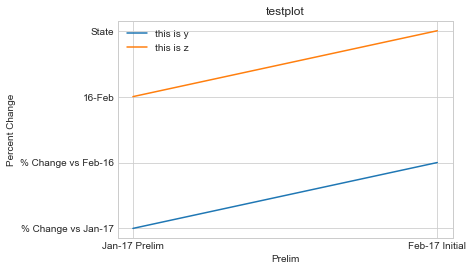

In [25]:
x = ['Jan-17 Prelim', 'Feb-17 Initial']
y = ['% Change vs Jan-17', '% Change vs Feb-16']
z = ['16-Feb', 'State']
plt.plot(x, y)
plt.plot(x, z)
plt.title('testplot')
plt.xlabel('Prelim')
plt.ylabel('Percent Change')
plt.legend(['this is y', 'this is z'])
plt.show

FoodInflation = pd.concat([eat, inflation])
FoodInflation.head(20)

FoodInflation.index = pd.DatetimeIndex(FoodInflation.index)
FoodInflation = FoodInflation.reset_index(drop=True)

array([[<AxesSubplot:title={'center':'FY 2012'}>,
        <AxesSubplot:title={'center':'FY 2013'}>],
       [<AxesSubplot:title={'center':'FY 2014'}>,
        <AxesSubplot:title={'center':'FY 2015'}>],
       [<AxesSubplot:title={'center':'FY 2016'}>, <AxesSubplot:>]],
      dtype=object)

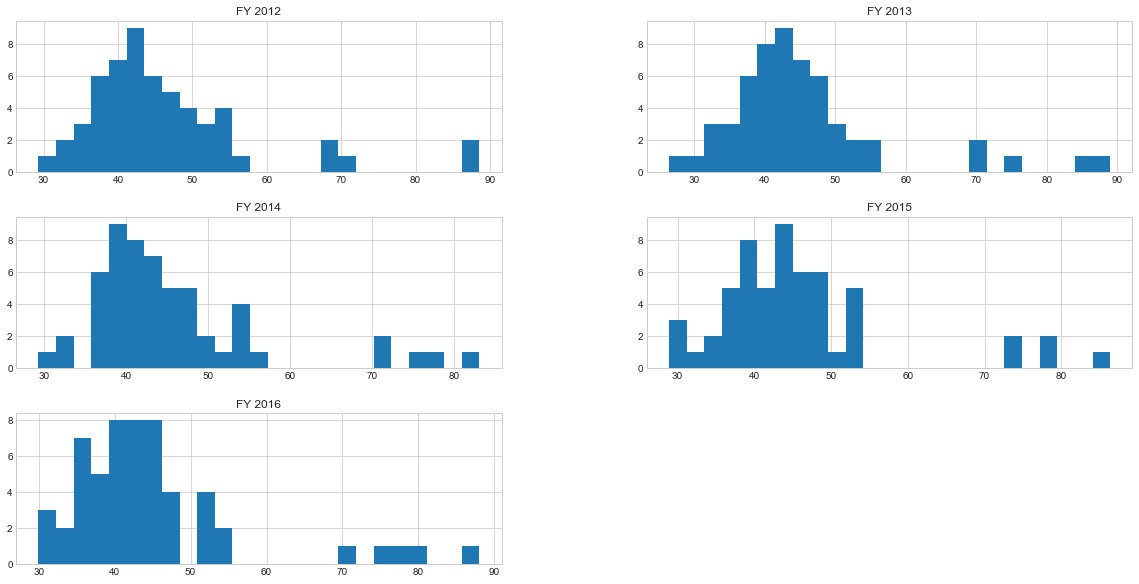

In [13]:
avgfc.hist(bins=25, figsize=[20, 10])

AttributeError: 'DataFrame' object has no attribute 'FY2012'

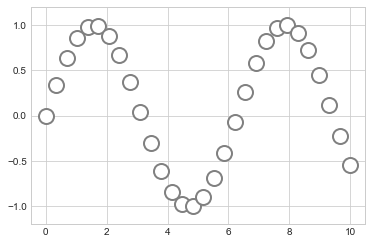

In [34]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)
plt.xlabel(avgfc.FY2012[0])
plt.ylabel(avgfc.state[1]);

#FoodInflation[['amount', 'year', 'inflation rate']].plot(style=".")

In [38]:
inflation.groupby(['year', 'amount'])['inflation rate'].count().sort_values(ascending=False).unstack()

amount,1.00,1.01,1.03,1.05,1.07,1.09,1.11,1.13,1.18,1.26
year,,,,,,,,,,
2012,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
